In [84]:
import numpy as np

from scipy import misc
import glob
import imageio

# for image_path in glob.glob("*.png"):
#     image = misc.imread(image_path)
#     print image.shape
#     print image.dtype
    

In [85]:
!ls depth_map


aov_image_0000.npy  aov_image_0368.npy
aov_image_0000.png  aov_image_0368.png
aov_image_0001.npy  aov_image_0369.npy
aov_image_0001.png  aov_image_0369.png
aov_image_0002.npy  aov_image_0370.npy
aov_image_0002.png  aov_image_0370.png
aov_image_0003.npy  aov_image_0371.npy
aov_image_0003.png  aov_image_0371.png
aov_image_0004.npy  aov_image_0372.npy
aov_image_0004.png  aov_image_0372.png
aov_image_0005.npy  aov_image_0373.npy
aov_image_0005.png  aov_image_0373.png
aov_image_0006.npy  aov_image_0374.npy
aov_image_0006.png  aov_image_0374.png
aov_image_0007.npy  aov_image_0375.npy
aov_image_0007.png  aov_image_0375.png
aov_image_0008.npy  aov_image_0376.npy
aov_image_0008.png  aov_image_0376.png
aov_image_0009.npy  aov_image_0377.npy
aov_image_0009.png  aov_image_0377.png
aov_image_0010.npy  aov_image_0378.npy
aov_image_0010.png  aov_image_0378.png
aov_image_0011.npy  aov_image_0379.npy
aov_image_0011.png  aov_image_0379.png
aov_image_0012.npy  aov_image_0380.npy
aov_image_0012.png  aov_i

In [86]:
image = imageio.imread("depth_map/aov_image_0016.png")

In [87]:
image.shape

(64, 64, 4)

In [88]:
np.max(image[:,:,0])

124

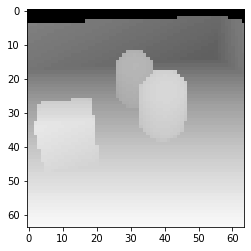

In [89]:
import matplotlib.pyplot as plt

# plt.imshow(image[:,:,0], cmap='gray', vmin=0, vmax=255)
plt.imshow(image[:,:,0], cmap='gray', vmin=0, vmax=127)
plt.show()

In [90]:
np.max(image[:,:,0]) / 127.0

0.9763779527559056

In [91]:
near = 0.8
far = 15

In [92]:
# inverse of perspective projection https://en.wikipedia.org/wiki/Z-buffering#Mathematics
k1 = (far + near) / (far - near)
k2 = (- 2.0 * far * near) / (far - near)

In [93]:
res = k2 / ((image[:,:,0] / np.max(image[:,:,0])) - k1)  

In [94]:
np.histogram(res)

(array([1233,  545,  468,  576,  510,  252,  128,  128,  128,  128]),
 array([ 1.51898734,  2.86708861,  4.21518987,  5.56329114,  6.91139241,
         8.25949367,  9.60759494, 10.9556962 , 12.30379747, 13.65189873,
        15.        ]))

In [95]:
np.max(res)

#6.883468834688346 with 127.0 

14.999999999999993

In [96]:
# use np.max of each image to scale

In [97]:
near = 0.8
far = 15
k1 = (far + near) / (far - near)
k2 = (- 2.0 * far * near) / (far - near)


def get_depth_images():
    depth_np_images = []

    for image_path in glob.glob("depth_map/*.png"):
        image = imageio.imread(image_path)

        divisor = np.max(image[:,:,0]) if np.max(image[:,:,0]) != 0 else 127.0 
        res = k2 / ((image[:,:,0] / divisor) - k1)  

        np.save(image_path.split(".")[0], res)

        depth_np_images.append(res)
        
    return depth_np_images
        
depth_np_images = get_depth_images()

In [98]:
!ls depth_map


aov_image_0000.npy  aov_image_0368.npy
aov_image_0000.png  aov_image_0368.png
aov_image_0001.npy  aov_image_0369.npy
aov_image_0001.png  aov_image_0369.png
aov_image_0002.npy  aov_image_0370.npy
aov_image_0002.png  aov_image_0370.png
aov_image_0003.npy  aov_image_0371.npy
aov_image_0003.png  aov_image_0371.png
aov_image_0004.npy  aov_image_0372.npy
aov_image_0004.png  aov_image_0372.png
aov_image_0005.npy  aov_image_0373.npy
aov_image_0005.png  aov_image_0373.png
aov_image_0006.npy  aov_image_0374.npy
aov_image_0006.png  aov_image_0374.png
aov_image_0007.npy  aov_image_0375.npy
aov_image_0007.png  aov_image_0375.png
aov_image_0008.npy  aov_image_0376.npy
aov_image_0008.png  aov_image_0376.png
aov_image_0009.npy  aov_image_0377.npy
aov_image_0009.png  aov_image_0377.png
aov_image_0010.npy  aov_image_0378.npy
aov_image_0010.png  aov_image_0378.png
aov_image_0011.npy  aov_image_0379.npy
aov_image_0011.png  aov_image_0379.png
aov_image_0012.npy  aov_image_0380.npy
aov_image_0012.png  aov_i

In [99]:
for item in depth_np_images:
    print(item.shape)
    print(np.max(item))

(64, 64)
1.518987341772152
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(6

14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
1

(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(64, 64)
1.518987341772152
(64, 64)
14.999999999999993
(64, 64)
14.999999999999993
(6

In [100]:
dim = np.array(depth_np_images).shape

dim

(735, 64, 64)

## Getting Instance segmentation

### Since we only need per object instance segmentation, we are going to compare per object whether depth map and instance segmentation overlap.

### EDIT: this is solved by GameView fix


In [39]:
!ls images

Datasetc9e1c3e1-6aaa-407b-a959-67c4a15ec387		  instances  rgb
SemanticSegmentation526b9dfa-a160-4a0a-abe5-33219f38b731  logs


In [48]:
instance_num = 623
instance_image = imageio.imread(f'images/instances/Instance_{instance_num}.png')

In [49]:
np.max(image)

255

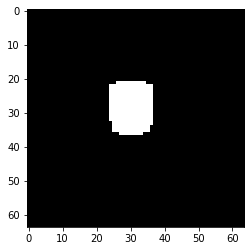

In [70]:
plt.imshow(image[:,:,0], cmap = 'gray', vmin=0, vmax=255)
plt.show()

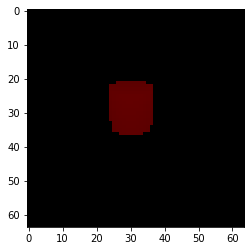

In [62]:
#depth map
depth_image = imageio.imread(f'depth_map/aov_image_0{instance_num-3}.png')
plt.imshow(depth_image, cmap = 'gray', vmin=0, vmax=255)
plt.show()

In [74]:
print(np.min(instance_image[:,:,0]), np.max(instance_image[:,:,0]))
print(np.min(depth_image[:,:,0]), np.max(depth_image[:,:,0]))

0 255
0 99


In [ ]:
## Checking whether depth image and instance segmentation have same pixels filled

In [76]:
pixel_threshold = 10
summed_for_comparison = np.sum((instance_image[:,:,0] > pixel_threshold) == (depth_image[:,:,0] > pixel_threshold))
summed_for_comparison_inverse = np.sum((instance_image[:,:,0] <= pixel_threshold) == (depth_image[:,:,0] <= pixel_threshold))

print(summed_for_comparison_inverse, summed_for_comparison, 64 * 64)

4096 4096 4096


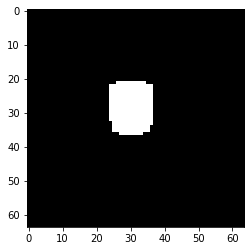

In [82]:
# Thresholding for masks segmentation and collecting 
instance_image = imageio.imread(f'images/instances/Instance_{instance_num}.png')

res_instance_image = (image[:,:,0] > 0) * 255
plt.imshow(res_instance_image, cmap = 'gray', vmin=0, vmax=255)
plt.show()

In [177]:
# Thresholding for masks segmentation and collecting 

def get_instance_masks():
    res_instance_masks = []
    for image_path in glob.glob("images/instances/*.png"):
        instance_image = imageio.imread(image_path)
    #     instance_image = imageio.imread(f'images/instances/Instance_{instance_num}.png')
        res_instance_image = (instance_image[:,:,0] > 0)

        np.save(image_path.split(".")[0], res_instance_image)


        res_instance_masks.append(res_instance_image)
        
    return res_instance_masks
    
res_instance_masks = get_instance_masks()

In [178]:
res_instance_masks[0].shape


(64, 64)

In [179]:
len(res_instance_masks)

734

### Depth recording is in advance for 3 frames, make sure depth_image[i - 3] is always included 

## Getting RGB images

In [111]:
!ls images/rgb

rgb_10.png   rgb_211.png  rgb_323.png  rgb_434.png  rgb_545.png  rgb_656.png
rgb_100.png  rgb_212.png  rgb_324.png  rgb_435.png  rgb_546.png  rgb_657.png
rgb_101.png  rgb_213.png  rgb_325.png  rgb_436.png  rgb_547.png  rgb_658.png
rgb_102.png  rgb_214.png  rgb_326.png  rgb_437.png  rgb_548.png  rgb_659.png
rgb_103.png  rgb_215.png  rgb_327.png  rgb_438.png  rgb_549.png  rgb_66.png
rgb_104.png  rgb_216.png  rgb_328.png  rgb_439.png  rgb_55.png	 rgb_660.png
rgb_105.png  rgb_217.png  rgb_329.png  rgb_44.png   rgb_550.png  rgb_661.png
rgb_106.png  rgb_218.png  rgb_33.png   rgb_440.png  rgb_551.png  rgb_662.png
rgb_107.png  rgb_219.png  rgb_330.png  rgb_441.png  rgb_552.png  rgb_663.png
rgb_108.png  rgb_22.png   rgb_331.png  rgb_442.png  rgb_553.png  rgb_664.png
rgb_109.png  rgb_220.png  rgb_332.png  rgb_443.png  rgb_554.png  rgb_665.png
rgb_11.png   rgb_221.png  rgb_333.png  rgb_444.png  rgb_555.png  rgb_666.png
rgb_110.png  rgb_222.png  rgb_334.png  rgb_445.png  rgb_556.png  rgb_667.png
r

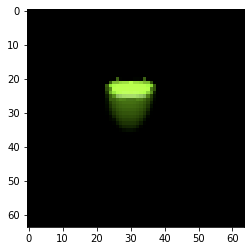

In [112]:
# Thresholding for masks segmentation and collecting 
rgb_image = imageio.imread(f'images/rgb/rgb_{instance_num}.png')

plt.imshow(rgb_image, cmap = 'gray', vmin=0, vmax=255)
plt.show()

In [83]:
## Collecting for 3 foreground objects their values, and 5 values for background objects

### Position, orientation and scale also needs to be collected

#### Scale is always 1, orientation no idea how tf to set this

In [116]:
!ls images/logs/objects_relative_to_cam.json

images/logs/objects_relative_to_cam.json


In [113]:
import json

In [117]:
with open('images/logs/objects_relative_to_cam.json') as f:
  data = json.load(f)

In [121]:
len(data['contentList'])

82

In [124]:
print(np.array(depth_np_images).shape, np.array(res_instance_masks).shape)

(735, 64, 64) (734, 64, 64)


In [126]:
734 / (5 + 3 + 1)

81.55555555555556

In [129]:
data['contentList'][1]['index']

9

In [132]:
print(instance_num, instance_num / (5 + 3 + 1))

623 69.22222222222223


621


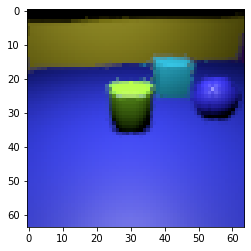

In [147]:
found_base_image = data['contentList'][69]['index']

print(found_base_image)
rgb_image = imageio.imread(f'images/rgb/rgb_{found_base_image + 1}.png')

plt.imshow(rgb_image, vmin=0, vmax=255)
plt.show()

In [148]:
data['contentList'][69]

{'foregroundObjects': [{'position': [-1.0610055923461914,
    0.18277621269226074,
    5.136577129364014],
   'type': 'cylinder(Clone)',
   'index': 0},
  {'position': [0.6930861473083496, 0.5332804918289185, 5.643669128417969],
   'type': 'sphere(Clone)',
   'index': 1},
  {'position': [-0.39071953296661377, 1.159210205078125, 6.827811241149902],
   'type': 'cube(Clone)',
   'index': 2}],
 'backgroundObjects': [{'position': [-0.9856504201889038,
    -0.5538797378540039,
    4.7606520652771],
   'type': 'Plane',
   'index': 0},
  {'position': [0.7373255491256714, -2.467745304107666, 0.44573962688446045],
   'type': 'wall1',
   'index': 1},
  {'position': [-2.7086262702941895, 2.226011276245117, 8.575565338134766],
   'type': 'wall2',
   'index': 2},
  {'position': [3.708110809326172, 0.7406158447265625, 6.00278377532959],
   'type': 'wall3',
   'index': 3},
  {'position': [-5.6794114112854, -0.9823493957519531, 3.0185208320617676],
   'type': 'wall4',
   'index': 4}],
 'index': 621}

## We see that  found_base_image = data['contentList'][i]['index'] can be used to get position found_base_image+1 from where to start drawing

### From here we will iterate through obj_pos to get all images, and all objects and background segments

In [274]:
current_i = 1
full_frame_index = data['contentList'][current_i]['index']

sample_frames = {'rgb_in' : [], 'rgb_gt' : [], 'depth_gt' : [], 'fore_msk_gt' : [], 'fore_z_extr_gt' : [], 'back_msk_gt' : [], 'back_z_extr_gt' : []}


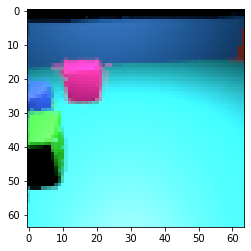

(1, 64, 64, 3)


In [275]:
#Reading full RGB image
rgb_image = imageio.imread(f'images/rgb/rgb_{full_frame_index + 1}.png')

plt.imshow(rgb_image[:,:,0:3], vmin=0, vmax=255)
plt.show()

#Goal : rgb_in & rgb_gt : [B, 1, 64, 64, 3]

print(rgb_image[None,:,:,0:3].shape)

sample_frames['rgb_in'].append(rgb_image[None,:,:,0:3])
sample_frames['rgb_gt'].append(rgb_image[None,:,:,0:3])

In [276]:
format(full_frame_index-3, '04')

'0006'

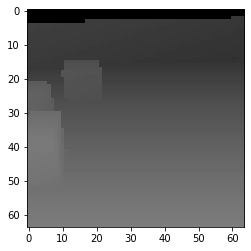

(1, 64, 64)


In [277]:
#Reading depth map
depth_image = imageio.imread("depth_map/aov_image_" + format(full_frame_index-2, '04') + ".png")
plt.imshow(depth_image[:,:,0], cmap = 'gray', vmin=0, vmax=255)
plt.show()


#Goal : depth_gt [B, 1, 64, 64]

print(depth_image[None,:,:,0].shape)

sample_frames['depth_gt'].append(depth_image[None,:,:,0])

In [278]:
current_object_on_index_i = 0
object_latent_variable = np.array(data['contentList'][current_i]['foregroundObjects'][current_object_on_index_i]['position'] + [0.0, 1.0])

object_latent_variable.shape

(5,)

In [279]:
foreground_len = len(data['contentList'][current_i]['foregroundObjects'])
background_len = len(data['contentList'][current_i]['backgroundObjects'])

In [280]:
foreground_mask_instances = []
foreground_latent_instances = []
for i in range(foreground_len):
    single_mask_instance = imageio.imread(f'images/instances/Instance_{full_frame_index+2+i}.png')
    restructured_single_mask_instance = (single_mask_instance[:,:,:] > 0)*255
    foreground_mask_instances.append(restructured_single_mask_instance)
    
    
    orientation = 0.0
    scale = 0.0
    
    object_latent_variable = np.array(data['contentList'][current_i]['foregroundObjects'][i]['position'] + [orientation, scale])
    foreground_latent_instances.append(object_latent_variable)

(3, 1, 64, 64)
(3, 1, 5)


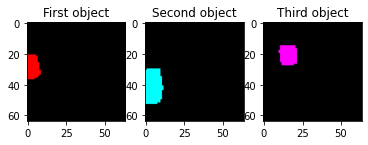

In [281]:
## Foreground Objects
fig, axs = plt.subplots(1, 3)

axs[0].imshow(foreground_mask_instances[0], cmap = 'gray', vmin=0, vmax=255)
axs[0].set_title('First object')
axs[1].imshow(foreground_mask_instances[1], cmap = 'gray', vmin=0, vmax=255)
axs[1].set_title('Second object')
axs[2].imshow(foreground_mask_instances[2], cmap = 'gray', vmin=0, vmax=255)
axs[2].set_title('Third object')


#Goal 'fore_msk_gt' [B, N, 1, 64, 64]

print(np.array(foreground_mask_instances)[:,None,:,:,0].shape)

sample_frames['fore_msk_gt'].append(np.array(foreground_mask_instances)[:,None,:,:,0])

#Goal 'fore_z_extr_gt' [B,N,1,5]

print(np.array(np.array(foreground_latent_instances))[:,None,:].shape)

sample_frames['fore_z_extr_gt'].append(np.array(np.array(foreground_latent_instances))[:,None,:])

In [282]:
background_mask_instances = []
background_latent_instances = []

for i in range(background_len):
    single_mask_instance = imageio.imread(f'images/instances/Instance_{full_frame_index+2+foreground_len + i}.png')
    restructured_single_mask_instance = (single_mask_instance[:,:,:] > 0)*255
    background_mask_instances.append(restructured_single_mask_instance)
    
    orientation = 0.0
    scale = 0.0
    
    object_latent_variable = np.array(data['contentList'][current_i]['backgroundObjects'][i]['position'] + [orientation, scale])
    background_latent_instances.append(object_latent_variable)
    

(5, 1, 64, 64)
(5, 1, 5)


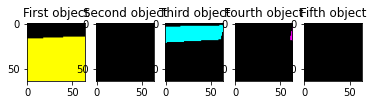

In [283]:
## Background Objects
fig, axs = plt.subplots(1, 5)


axs[0].imshow(background_mask_instances[0], cmap = 'gray', vmin=0, vmax=255)
axs[0].set_title('First object')
axs[1].imshow(background_mask_instances[1], cmap = 'gray', vmin=0, vmax=255)
axs[1].set_title('Second object')
axs[2].imshow(background_mask_instances[2], cmap = 'gray', vmin=0, vmax=255)
axs[2].set_title('Third object')
axs[3].imshow(background_mask_instances[3], cmap = 'gray', vmin=0, vmax=255)
axs[3].set_title('Fourth object')
axs[4].imshow(background_mask_instances[4], cmap = 'gray', vmin=0, vmax=255)
axs[4].set_title('Fifth object')


#Goal 'back_msk_gt' [B, N, 1, 64, 64]

print(np.array(background_mask_instances)[:,None,:,:,0].shape)

sample_frames['back_msk_gt'].append(np.array(background_mask_instances)[:,None,:,:,0])

#Goal 'back_z_extr_gt' [B,N,1,5]

print(np.array(background_latent_instances)[:,None,:].shape)

sample_frames['back_z_extr_gt'].append(np.array(background_latent_instances)[:,None,:])


In [284]:
print(np.array(foreground_mask_instances).shape)

(3, 64, 64, 4)


In [285]:
sample_frames.keys()

dict_keys(['rgb_in', 'rgb_gt', 'depth_gt', 'fore_msk_gt', 'fore_z_extr_gt', 'back_msk_gt', 'back_z_extr_gt'])

## Finally , go through all samples (restart kernel from here)

In [2]:
import json
import numpy as np

from scipy import misc
import glob
import imageio

In [3]:
def get_absolute_depth_image(image,near = 0.8, far = 15):
    k1 = (far + near) / (far - near)
    k2 = (- 2.0 * far * near) / (far - near)

    divisor = np.max(image[:,:,0]) if np.max(image[:,:,0]) != 0 else 127.0 
    res = k2 / ((image[:,:,0] / divisor) - k1)  


    return res

In [7]:
!ls full_12k_samples_dataset_3_objects

Dataset294cada5-594a-427e-bd62-4bfea69756ba		  depth_map  logs
SemanticSegmentation23b30eb6-7d17-4349-ab7a-79bd09882dfd  instances  rgb


In [ ]:
sample_frames = {'rgb_in' : [], 'rgb_gt' : [], 'depth_gt' : [], 'fore_msk_gt' : [], 'fore_z_extr_gt' : [], 'back_msk_gt' : [], 'back_z_extr_gt' : []}

path = 'full_12k_samples_dataset_3_objects'
with open(f'{path}/logs/objects_relative_to_cam.json') as f:
  data = json.load(f)

frame_count = len(data['contentList'])

for current_i_frame in range(1,frame_count-1):
    full_frame_index = data['contentList'][current_i_frame]['index']

    foreground_len = len(data['contentList'][current_i_frame]['foregroundObjects'])
    background_len = len(data['contentList'][current_i_frame]['backgroundObjects'])
    
    #Reading full RGB image
    rgb_image = imageio.imread(f'{path}/rgb/rgb_{full_frame_index + 1}.png')
    #Goal : rgb_in & rgb_gt : [B, 1, 64, 64, 3]
    #print(rgb_image[None,:,:,0:3].shape)

    sample_frames['rgb_in'].append(rgb_image[None,:,:,0:3])
    sample_frames['rgb_gt'].append(rgb_image[None,:,:,0:3])
    

    #Reading depth map
    depth_image = imageio.imread(f'{path}/depth_map/aov_image_' + format(full_frame_index-2, '04') + ".png")
    absolute_depth_image = get_absolute_depth_image(depth_image)
    
    #Goal : depth_gt [B, 1, 64, 64]

    sample_frames['depth_gt'].append(absolute_depth_image[None,:,:,None])
    
    foreground_mask_instances = []
    foreground_latent_instances = []
    for current_object in range(foreground_len):
        single_mask_instance = imageio.imread(f'{path}/instances/Instance_{full_frame_index+2+current_object}.png')
        restructured_single_mask_instance = (single_mask_instance[:,:,:] > 0)*255
        foreground_mask_instances.append(restructured_single_mask_instance)


        orientation = data['contentList'][current_i_frame]['foregroundObjects'][current_object]['orientation']
        scale = data['contentList'][current_i_frame]['foregroundObjects'][current_object]['scale']

        object_latent_variable = np.array(data['contentList'][current_i_frame]['foregroundObjects'][current_object]['position'] + [orientation, scale])
        foreground_latent_instances.append(object_latent_variable)
    
    #Goal 'fore_msk_gt' [B, N, 1, 64, 64]

    sample_frames['fore_msk_gt'].append(np.array(foreground_mask_instances)[:,None,:,:,0])
    
    #Goal 'fore_z_extr_gt' [B,N,1,5]

    sample_frames['fore_z_extr_gt'].append(np.array(foreground_latent_instances)[:,None,:])
    
    
    background_mask_instances = []
    background_latent_instances = []

    for current_object in range(background_len):
        single_mask_instance = imageio.imread(f'{path}/instances/Instance_{full_frame_index+2+foreground_len + current_object}.png')
        restructured_single_mask_instance = (single_mask_instance[:,:,:] > 0)*255
        background_mask_instances.append(restructured_single_mask_instance)

        orientation = data['contentList'][current_i_frame]['backgroundObjects'][current_object]['orientation']
        scale = data['contentList'][current_i_frame]['backgroundObjects'][current_object]['scale']

        object_latent_variable = np.array(data['contentList'][current_i_frame]['backgroundObjects'][current_object]['position'] + [orientation, scale])
        background_latent_instances.append(object_latent_variable)
    
    
    #Goal 'back_msk_gt' [B, N, 1, 64, 64]

    sample_frames['back_msk_gt'].append(np.array(background_mask_instances)[:,None,:,:,0])

    #Goal 'back_z_extr_gt' [B,N,1,5]

    sample_frames['back_z_extr_gt'].append(np.array(background_latent_instances)[:,None,:])
    
    if(current_i_frame % 100 == 0):
        print(f'{current_i_frame}/12000, {current_i_frame/12000}%')

100/12000, 0.008333333333333333%
200/12000, 0.016666666666666666%
300/12000, 0.025%
400/12000, 0.03333333333333333%
500/12000, 0.041666666666666664%
600/12000, 0.05%
700/12000, 0.058333333333333334%
800/12000, 0.06666666666666667%
900/12000, 0.075%
1000/12000, 0.08333333333333333%
1100/12000, 0.09166666666666666%
1200/12000, 0.1%
1300/12000, 0.10833333333333334%
1400/12000, 0.11666666666666667%
1500/12000, 0.125%
1600/12000, 0.13333333333333333%
1700/12000, 0.14166666666666666%
1800/12000, 0.15%
1900/12000, 0.15833333333333333%
2000/12000, 0.16666666666666666%
2100/12000, 0.175%
2200/12000, 0.18333333333333332%
2300/12000, 0.19166666666666668%
2400/12000, 0.2%
2500/12000, 0.20833333333333334%


In [25]:
    #Goal : rgb_in & rgb_gt : [B, 1, 64, 64, 3]
print(np.array(sample_frames['rgb_in']).shape)
    #Goal : depth_gt [B, 1, 64, 64]
print(np.array(sample_frames['depth_gt']).shape)
    #Goal 'fore_msk_gt' [B, N, 1, 64, 64]
print(np.array(sample_frames['fore_msk_gt']).shape)
    #Goal 'fore_z_extr_gt' [B,N,1,5]
print(np.array(sample_frames['fore_z_extr_gt']).shape)
    #Goal 'back_msk_gt' [B, N, 1, 64, 64]
print(np.array(sample_frames['back_msk_gt']).shape)
    #Goal 'back_z_extr_gt' [B,N,1,5]
print(np.array(sample_frames['back_z_extr_gt']).shape)

(80, 1, 64, 64, 3)
(80, 1, 64, 64, 1)
(80, 3, 1, 64, 64)
(80, 3, 1, 5)
(80, 5, 1, 64, 64)
(80, 5, 1, 5)


In [26]:
## Saving them

for key,value in sample_frames.items():
    with open(f'{key}.npy', 'wb') as f:
        np.save(key, np.array(value))

In [27]:
!ls

Notebook_for_reading.ipynb  depth_gt.npy     fore_z_extr_gt.npy  rgb_in.npy
back_msk_gt.npy		    depth_map	     images
back_z_extr_gt.npy	    fore_msk_gt.npy  rgb_gt.npy
